In [27]:
import os.path

import pandas as pd
import matplotlib.pyplot as plt

In [28]:
from datatool import *
import datatool
from imp import reload
reload(datatool)

<module 'datatool' from '/Users/hyc/22 Spring/IS 597/2022Spring_Finals_EV/datatool.py'>

In [29]:
download_file('wa_ev_registrations_public', 'https://www.atlasevhub.com/public/dmv/wa_ev_registrations_public.csv')
download_file('ny_ev_registrations_public', 'https://www.atlasevhub.com/public/dmv/ny_ev_registrations_public.csv')
download_file('tx_ev_registrations_public', 'https://www.atlasevhub.com/public/dmv/tx_ev_registrations_public.csv')
download_file('ev_stations_v1', 'https://www.kaggle.com/datasets/prasertk/electric-vehicle-charging-stations-in-usa/download')
download_file('uszips', 'https://simplemaps.com/static/data/us-zips/1.80/basic/simplemaps_uszips_basicv1.80.zip')

# Hypothesis 2:
# Development trends for different electric vehicles are inconsistent. Tesla always possesses the most progressive models in the EV market.

### Data Pre-Processing for Dataframe

In [30]:
wa_df = pd.read_csv('data/wa_ev_registrations_public.csv')
wa_df, wa_df_recently = preprocess_dataframe(wa_df, [2015, 1, 1])
wa_df.head(10)

/Users/hyc/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Vehicle ID,ZIP Code,Registration Valid Date,VIN Prefix,VIN Model Year,DMV ID,DMV ID Complete,DMV Snapshot,Registration Expiration Date,State Abbreviation,Geography,Vehicle Name,Technology,Valid Datetime,Valid Month,Valid Quarter,Valid Year,Dynamic Type
0,WA-048-187056656,98118,2022-04-26,5YJ3E1EC,N,48,WA48,WA DMV Direct (4/26/2022),NaN,WA,ZIP Code,Tesla Model 3,BEV,2022-04-26,2022-04,2022Q2,2022,1
1,WA-048-121710305,98513,2022-04-26,WBY1Z4C5,E,48,WA48,WA DMV Direct (4/26/2022),NaN,WA,ZIP Code,BMW i3 REx,PHEV,2022-04-26,2022-04,2022Q2,2022,0
2,WA-048-114779276,99204,2022-04-26,SADHD2S1,K,48,WA48,WA DMV Direct (4/26/2022),NaN,WA,ZIP Code,Jaguar I-Pace,BEV,2022-04-26,2022-04,2022Q2,2022,1
3,WA-048-112835579,98105,2022-04-26,5YJYGDEE,L,48,WA48,WA DMV Direct (4/26/2022),NaN,WA,ZIP Code,Tesla Model Y,BEV,2022-04-26,2022-04,2022Q2,2022,1
4,WA-048-248728770,98531,2022-04-26,1G1RB6S5,J,48,WA48,WA DMV Direct (4/26/2022),NaN,WA,ZIP Code,Chevrolet Volt,PHEV,2022-04-26,2022-04,2022Q2,2022,0
5,WA-048-146836336,98225,2022-04-26,WMEFJ9BA,H,48,WA48,WA DMV Direct (4/26/2022),NaN,WA,ZIP Code,Smart forTwo EV,BEV,2022-04-26,2022-04,2022Q2,2022,1
6,WA-048-171883897,98075,2022-04-26,5YJSA1DG,D,48,WA48,WA DMV Direct (4/26/2022),NaN,WA,ZIP Code,Tesla Model S,BEV,2022-04-26,2022-04,2022Q2,2022,1
7,WA-048-153874850,98107,2022-04-26,WDC0G5EB,K,48,WA48,WA DMV Direct (4/26/2022),NaN,WA,ZIP Code,Mercedes GLC 350e Hybrid,PHEV,2022-04-26,2022-04,2022Q2,2022,0
8,WA-048-127404035,98116,2022-04-26,5YJXCAE2,L,48,WA48,WA DMV Direct (4/26/2022),NaN,WA,ZIP Code,Tesla Model X,BEV,2022-04-26,2022-04,2022Q2,2022,1
9,WA-048-172290828,98109,2022-04-26,1G1FZ6S0,N,48,WA48,WA DMV Direct (4/26/2022),NaN,WA,ZIP Code,Chevrolet Bolt EUV,BEV,2022-04-26,2022-04,2022Q2,2022,1


#### show the earliest and latest registration date, which also represents the data capture time period

In [31]:
min(wa_df['Valid Datetime']), max(wa_df['Valid Datetime']), min(wa_df_recently['Valid Datetime']), max(wa_df_recently['Valid Datetime'])

(Timestamp('2010-01-06 00:00:00'),
 Timestamp('2022-04-26 00:00:00'),
 Timestamp('2015-01-02 00:00:00'),
 Timestamp('2022-04-26 00:00:00'))

In [32]:
wa_df_month = get_monthly_report(wa_df)
wa_df_month.head(10)

,Valid Month,Vehicles Total Number,BEV Number,PHEV Number
0,2010-01,1,1,0
1,2010-02,5,5,0
2,2010-03,13,13,0
3,2010-04,9,9,0
4,2010-05,7,7,0
5,2010-06,3,3,0
6,2010-07,9,9,0
7,2010-08,5,5,0
8,2010-09,3,3,0
9,2010-10,8,8,0


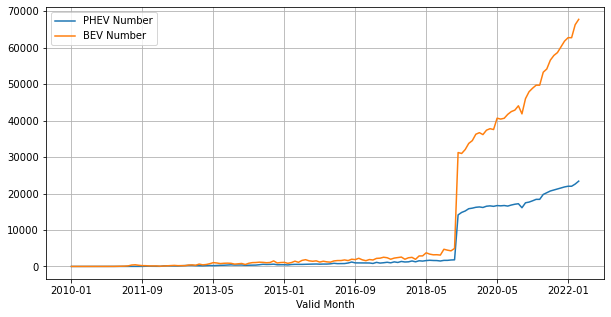

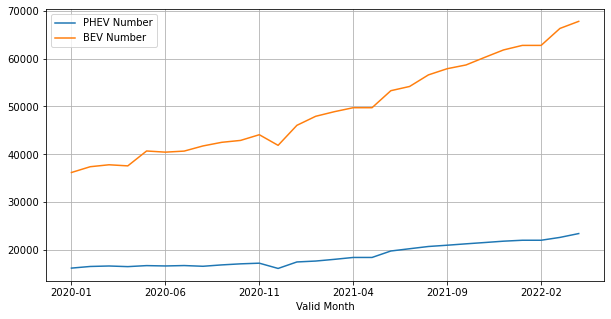

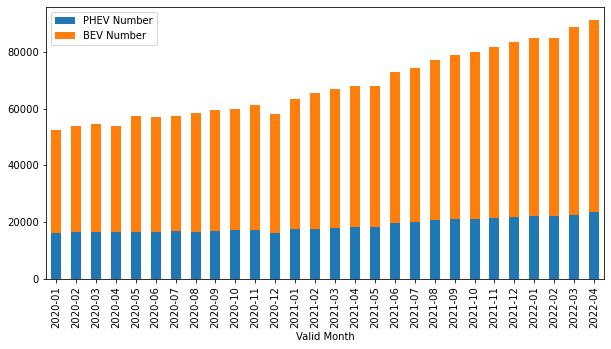

In [33]:
draw_month_report(wa_df_month)

According to the plot, EV developed very slowly before 2018 in WA. However, early in 2019, there occurred a huge boost in the EV market. The curve goes up to about four or five times each month, and immediately the registration number goes beyond 10 thousand and 30 thousand separately. From that time, BEV became the majority part of Electric Vehicle, and the Rising curve is steeper than the PHEV, it accounts for about 70% of the market. After that, the curve tends to be steady and the volatility can be ignored.
In this way, we can say that both PHEV and BEV have different trends in different years.

<AxesSubplot:title={'center':'Quarterly EV Rigstration'}, xlabel='Quarter', ylabel='Vehicle Amount'>

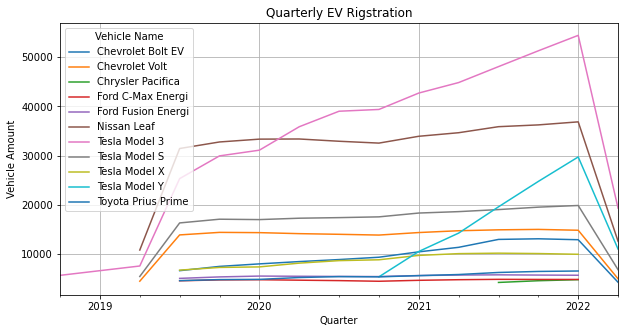

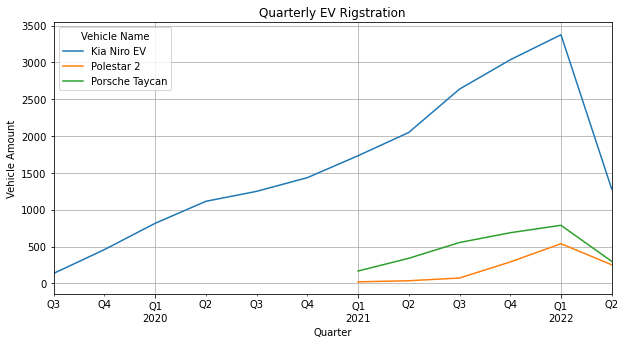

In [34]:
# draw multiple car quarterly data
df_pivot_car_in_quarter_all = get_vehicle_quarterly_data(wa_df, [], 4000)
df_pivot_car_in_quarter_all.plot(figsize=(10, 5), title='Quarterly EV Rigstration', grid=True, xlabel='Quarter', ylabel='Vehicle Amount')
df_pivot_car_in_quarter = get_vehicle_quarterly_data(wa_df, ['Porsche Taycan', 'Kia Niro EV', 'Polestar 2'])
df_pivot_car_in_quarter.plot(figsize=(10, 5), title='Quarterly EV Rigstration', grid=True, xlabel='Quarter', ylabel='Vehicle Amount')

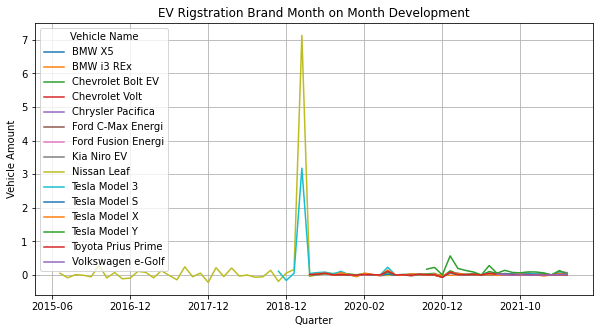

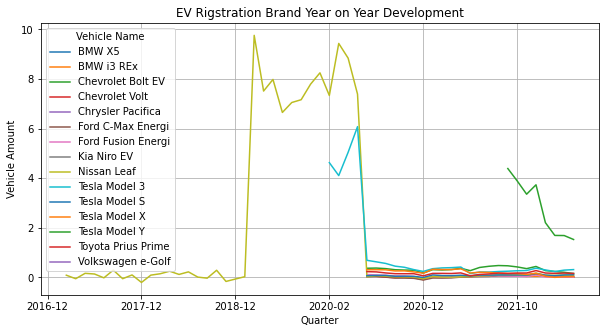

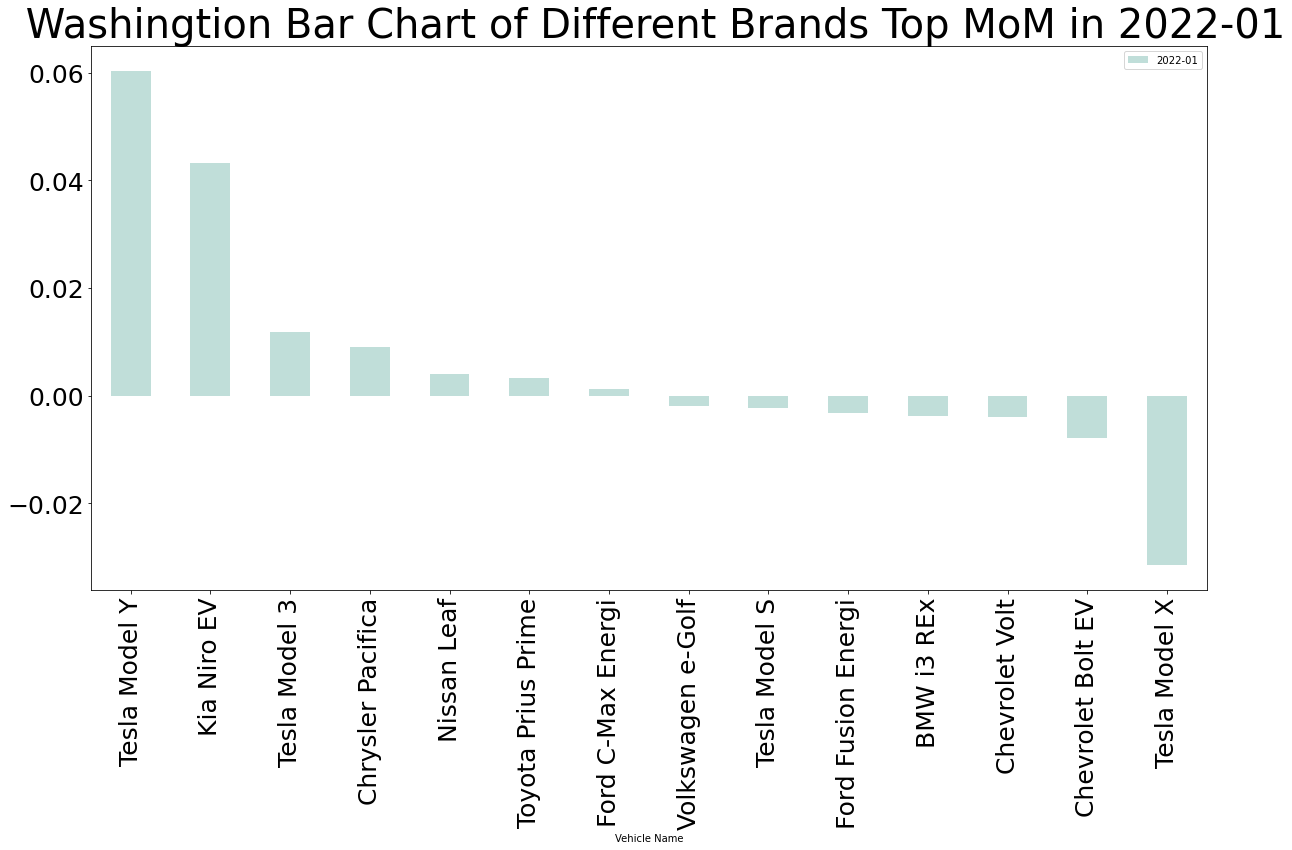

In [35]:
df_ev_mom_wa, df_ev_yoy_wa, df_ev_mom_t_wa = get_mom_yoy(wa_df_recently,'2022-01', 1000)
draw_mom_yoy(df_ev_mom_wa, df_ev_yoy_wa, df_ev_mom_t_wa, 'Washingtion', '2022-01')

We rank all the valid car models by descending order. Regarding Washington State, Tesla Model X and Model 3 are the top two models with the highest increase ratio in March of 2020 while Tesla Model Y and Model 3 are the top two. As time goes by, the dominance of Model 3 has changed because of new models’ arrival.

### New York State

In [36]:
ny_df = pd.read_csv('data/ny_ev_registrations_public.csv')
ny_df, ny_df_recently = preprocess_dataframe(ny_df, [2015, 1, 1])
ny_df_month = get_monthly_report(ny_df)
ny_df_month.head(10)

,Valid Month,Vehicles Total Number,BEV Number,PHEV Number
0,2011-01,2231,2176,55
1,2012-01,2694,2186,508
2,2012-12,5283,2507,2776
3,2013-07,30,28,2
4,2013-08,195,130,65
5,2013-09,235,61,174
6,2013-10,242,60,182
7,2013-11,259,57,202
8,2013-12,9580,3528,6052
9,2014-01,309,76,233


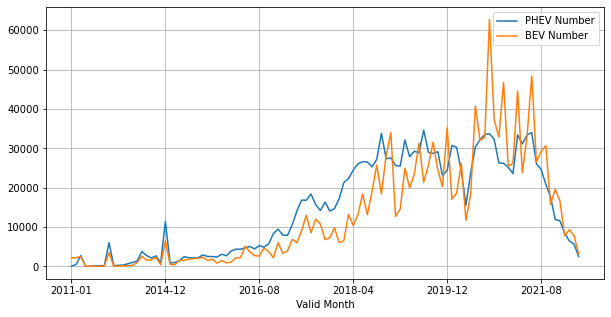

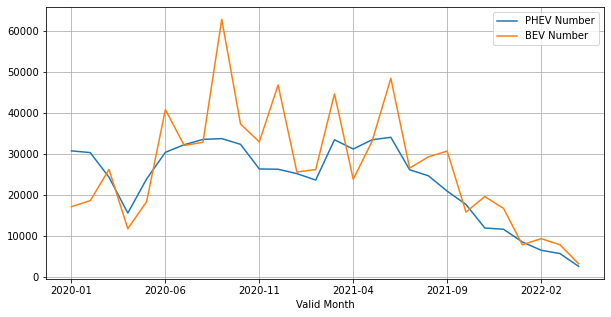

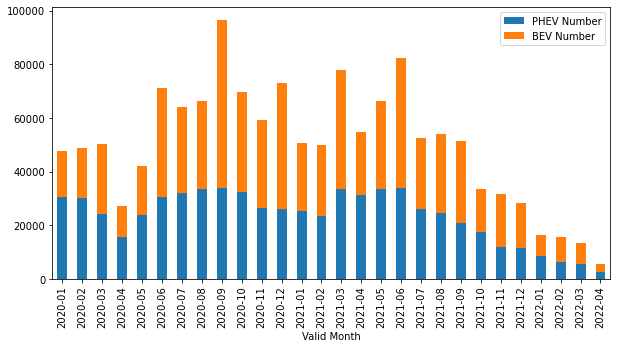

In [37]:
draw_month_report(ny_df_month)

<AxesSubplot:title={'center':'Quarterly EV Rigstration'}, xlabel='Quarter', ylabel='Vehicle Amount'>

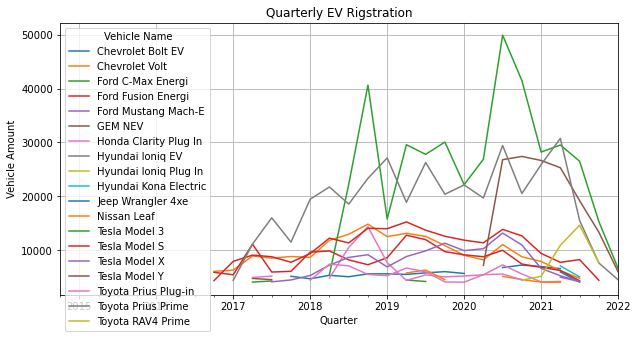

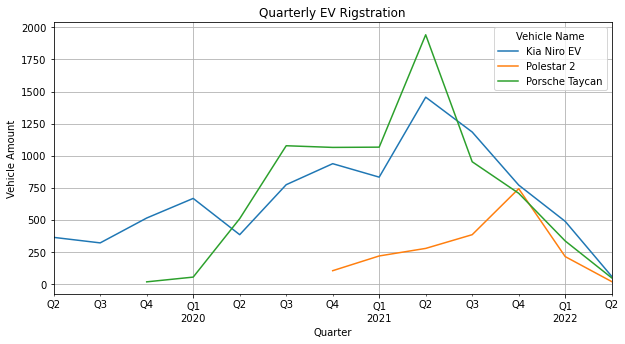

In [38]:
df_pivot_car_in_quarter_all = get_vehicle_quarterly_data(ny_df, [], 4000)
df_pivot_car_in_quarter_all.plot(figsize=(10, 5), title='Quarterly EV Rigstration', grid=True, xlabel='Quarter', ylabel='Vehicle Amount')
df_pivot_car_in_quarter = get_vehicle_quarterly_data(ny_df, ['Porsche Taycan', 'Kia Niro EV', 'Polestar 2'])
df_pivot_car_in_quarter.plot(figsize=(10, 5), title='Quarterly EV Rigstration', grid=True, xlabel='Quarter', ylabel='Vehicle Amount')

From the plot, we can see that most popular registered car is Tesla Model 3 in NY, Toyota Prius Prime is the second, and the third one is Tesla Model Y. Among all of them, the most craggy curve is Tesla Model 3. The reason I think it’s because it's the most popular EV brand among young people, and Tesla’s director Elon Musk did a lot of advertisements on social media and the Internet. so the decisions made by the customers are always due to their personal preferences and brand mania.

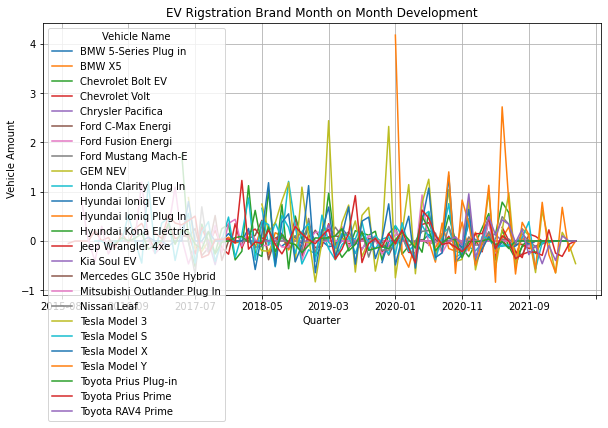

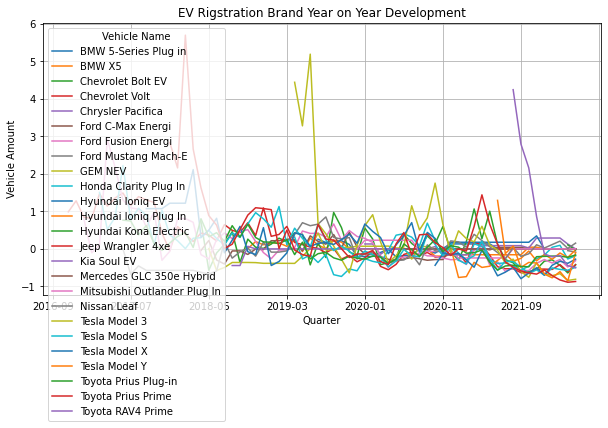

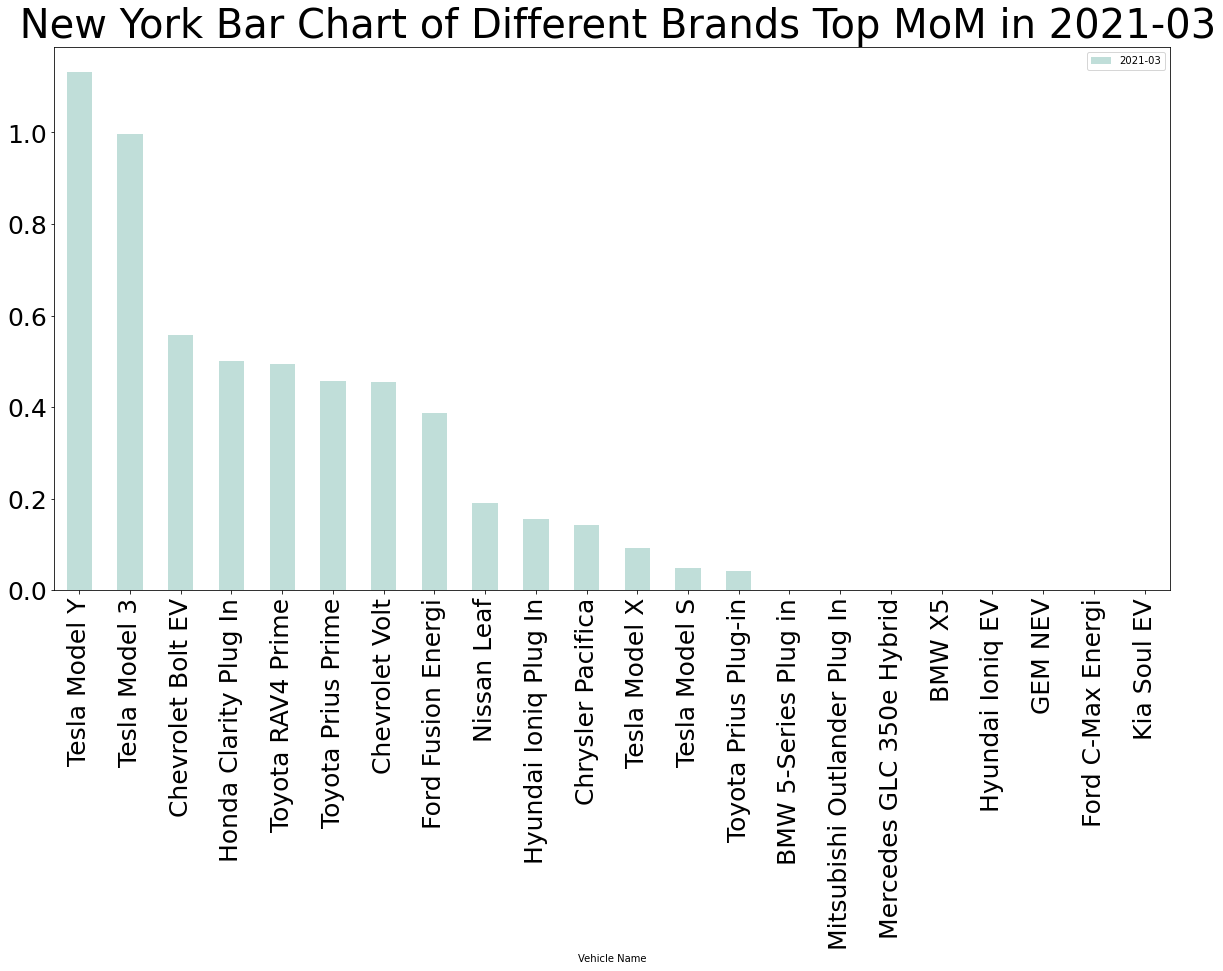

In [39]:
df_ev_mom_ny, df_ev_yoy_ny, df_ev_mom_t_ny = get_mom_yoy(ny_df_recently, '2021-03', 1000)
draw_mom_yoy(df_ev_mom_ny, df_ev_yoy_ny, df_ev_mom_t_ny, 'New York', '2021-03')

In New York State, Nissan Leaf and Toyota RAV4 Prime start to keep up with Tesla. They have a great potential to gain more customers and advocators, probably because of their good word of mouth as time goes by.

### Texas State

In [40]:
tx_df = pd.read_csv('data/ny_ev_registrations_public.csv')
tx_df, tx_df_recently = preprocess_dataframe(tx_df, [2015, 1, 1])
tx_df_month = get_monthly_report(tx_df)
tx_df_month.head(10)

,Valid Month,Vehicles Total Number,BEV Number,PHEV Number
0,2011-01,2231,2176,55
1,2012-01,2694,2186,508
2,2012-12,5283,2507,2776
3,2013-07,30,28,2
4,2013-08,195,130,65
5,2013-09,235,61,174
6,2013-10,242,60,182
7,2013-11,259,57,202
8,2013-12,9580,3528,6052
9,2014-01,309,76,233


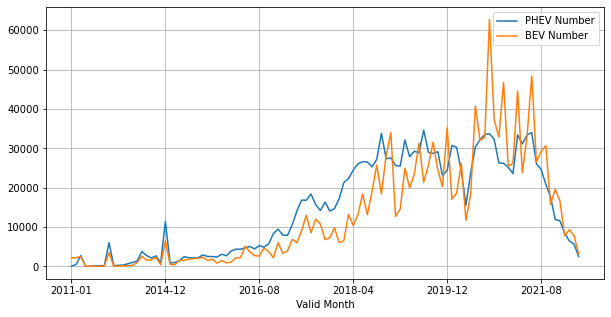

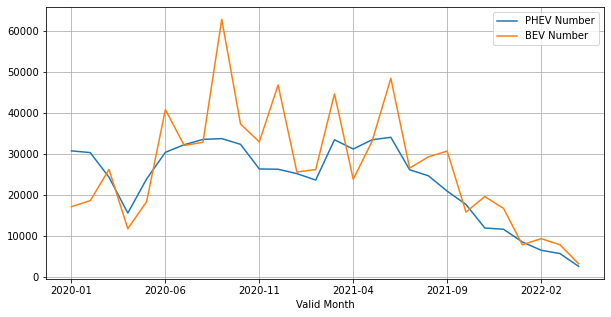

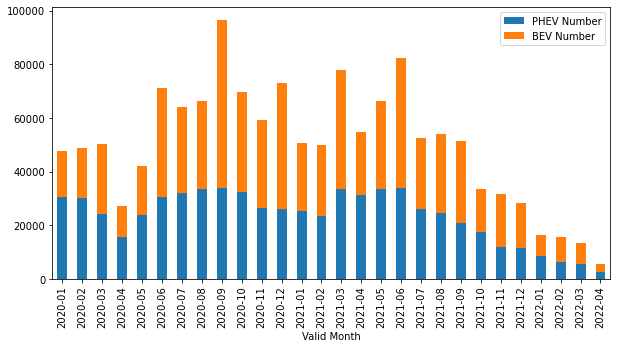

In [41]:
draw_month_report(tx_df_month)

<AxesSubplot:title={'center':'Quarterly EV Rigstration'}, xlabel='Quarter', ylabel='Vehicle Amount'>

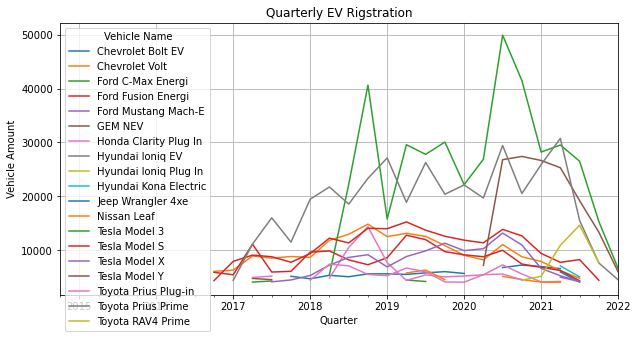

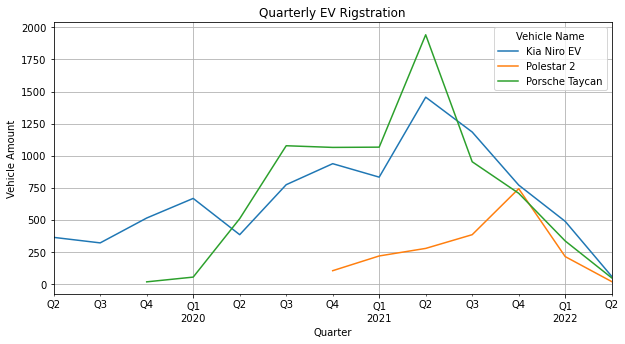

In [42]:
# draw multiple car quarterly data
df_pivot_car_in_quarter_all = get_vehicle_quarterly_data(tx_df, [], 4000)
df_pivot_car_in_quarter_all.plot(figsize=(10, 5), title='Quarterly EV Rigstration', grid=True, xlabel='Quarter', ylabel='Vehicle Amount')
df_pivot_car_in_quarter = get_vehicle_quarterly_data(tx_df, ['Porsche Taycan', 'Kia Niro EV', 'Polestar 2'])
df_pivot_car_in_quarter.plot(figsize=(10, 5), title='Quarterly EV Rigstration', grid=True, xlabel='Quarter', ylabel='Vehicle Amount')

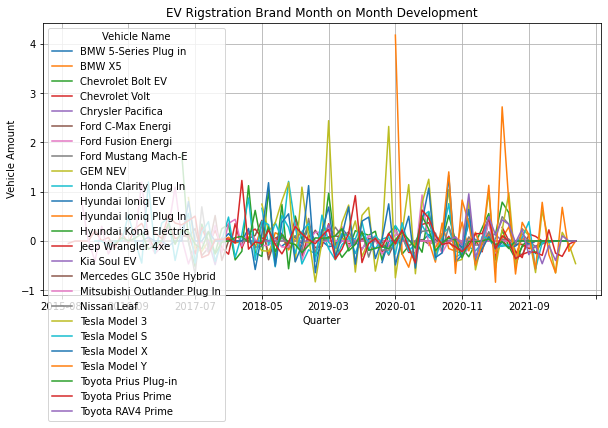

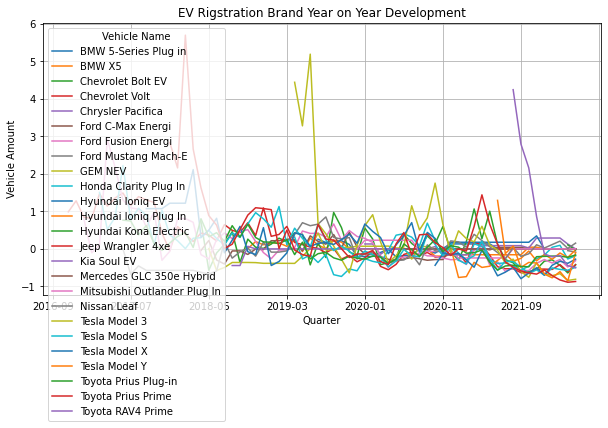

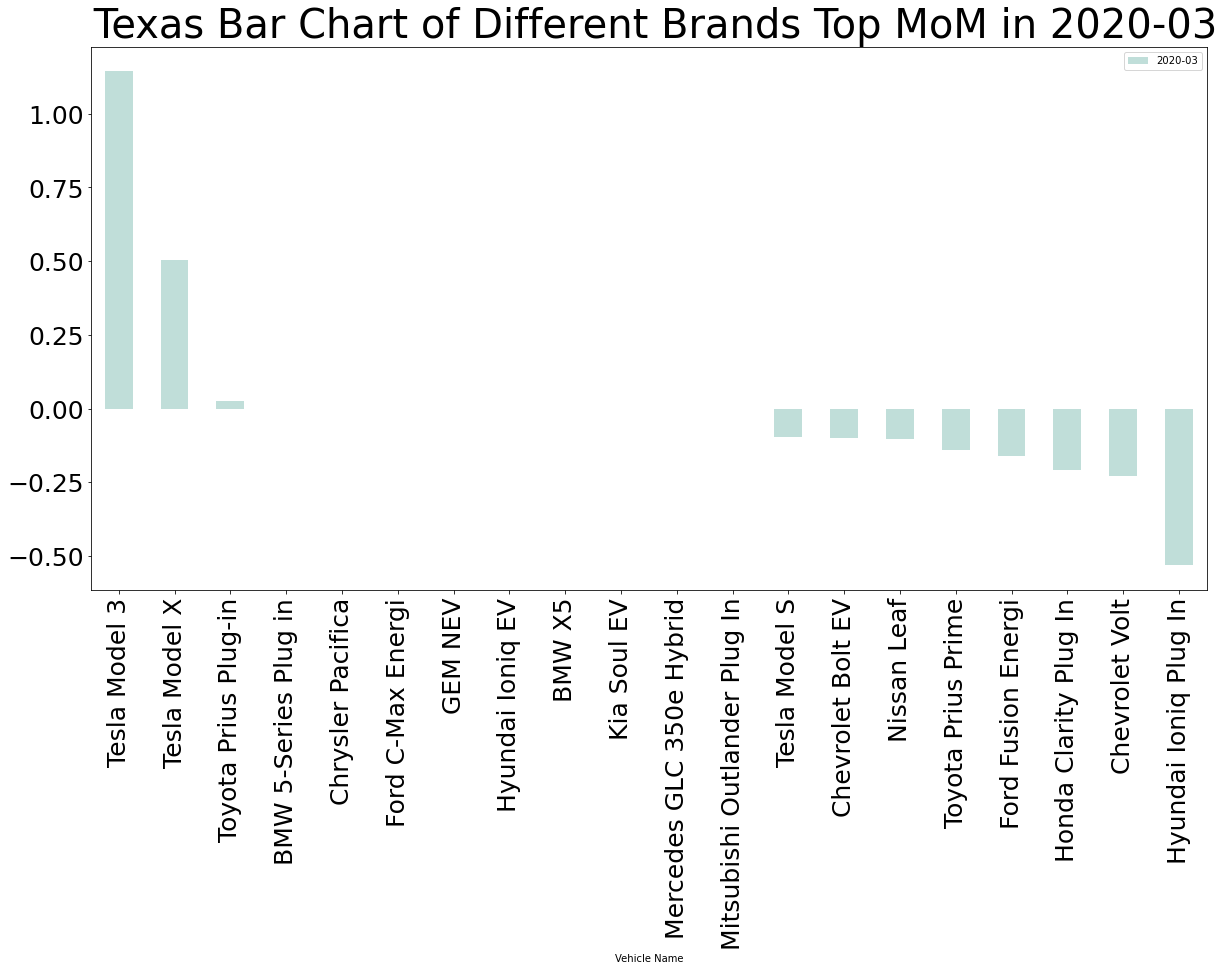

In [43]:
df_ev_mom_tx, df_ev_yoy_tx, df_ev_mom_t_tx = get_mom_yoy(tx_df_recently, '2020-03', 1000)
draw_mom_yoy(df_ev_mom_tx, df_ev_yoy_tx, df_ev_mom_t_tx, 'Texas', '2020-03')

## Summary
In conclusion, we can confirm that Development trends for different electric vehicles are inconsistent. And different types of EV, different states also have different results. Tesla now is the most progressive make in the EV market of these months, however, some new brands and makes are starting to make their mark in our sights. In other words, Tesla is facing some Crises and Challenges now.